In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df = pd.read_csv("Data.csv")
df.columns

Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number', 'College name', 'University Name', 'Degree',
       'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
       'Current Employment Status', 'Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Certifications/Achievement/ Research papers',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile', 'How Did You Hear About This Internship?',
       'Label'],
      dtype='object')

In [3]:
df.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-00,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-97,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-96,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-99,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-96,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [4]:
# Null values sorted in descending order
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

link to Linkedin profile                                     100.0
Link to updated Resume (Google/ One Drive link preferred)    100.0
Certifications/Achievement/ Research papers                  100.0
Label                                                          0.0
Age                                                            0.0
College name                                                   0.0
Emergency Contact Number                                       0.0
Contact Number                                                 0.0
Email Address                                                  0.0
Gender                                                         0.0
Zip Code                                                       0.0
DOB [DD/MM/YYYY]                                               0.0
Degree                                                         0.0
State                                                          0.0
City                                                          

In [5]:
df=df.drop(["Email Address"],axis=1)
df=df.drop(["First Name"],axis=1)
df=df.drop(["Last Name"],axis=1)
df=df.drop(["Zip Code"],axis=1)
df=df.drop(["Contact Number"],axis=1)
df=df.drop(["Emergency Contact Number"],axis=1)
df=df.drop(["Course Type"],axis=1)
df=df.drop(["Current Employment Status"],axis=1)
df=df.drop(["Expected Graduation-year"],axis=1)
df=df.drop(["State"],axis=1)
df=df.drop(["Certifications/Achievement/ Research papers"],axis=1)
df=df.drop(["DOB [DD/MM/YYYY]"],axis=1)
df=df.drop(["Link to updated Resume (Google/ One Drive link preferred)"],axis=1)
df=df.drop(["link to Linkedin profile"],axis=1)

In [6]:
# Check the data agian for null values
df.isnull().sum()

City                                                      0
Age                                                       0
Gender                                                    0
College name                                              0
University Name                                           0
Degree                                                    0
Major/Area of Study                                       0
Which-year are you studying in?                           0
CGPA/ percentage                                          0
Areas of interest                                         0
Have you worked core Java                                 0
Programming Language Known other than Java (one major)    0
Have you worked on MySQL or Oracle database               0
Have you studied OOP Concepts                             0
Rate your written communication skills [1-10]             0
Rate your verbal communication skills [1-10]              0
How Did You Hear About This Internship? 

# The number of students applied to different technologies

In [10]:
dftech=df["Areas of interest"]

dftechplot=dftech.value_counts().to_frame()
dftechplot

,Areas of interest
DevOps,674
Machine Learning,671
Python,652
Cyber Security,638
Web Development,637
QMS/Testing,633
Mobility,631
IoT,630
Artificial Intelligence,627
Digital Marketing,624


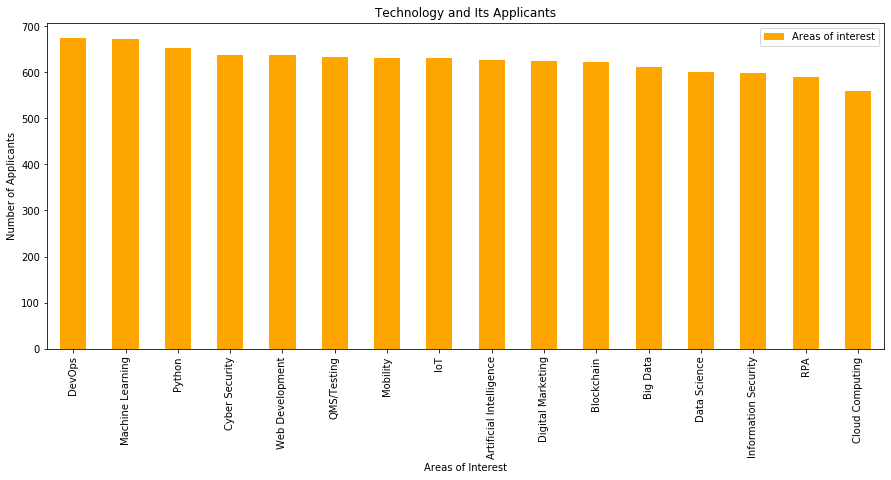

In [11]:
dftechplot.plot(kind='bar', figsize=(15, 6),color="orange")
plt.xlabel('Areas of Interest')
plt.ylabel('Number of Applicants')
plt.title('Technology and Its Applicants')
plt.show()

# The number of students who applied for Data Science and who knew ‘’Python” and who did not

In [13]:
df1=df[["Areas of interest","Programming Language Known other than Java (one major)"]]
area=df1.groupby(["Areas of interest"])#grouping via technology
area1 = area.get_group('Data Science')#getting data science applicants choices
interestplot=area1["Programming Language Known other than Java (one major)"].value_counts().to_frame()
interestplot

,Programming Language Known other than Java (one major)
HTML/CSS,86
JavaScript,82
C++,80
C#,75
.Net,74
C,74
Python,66
PHP,64


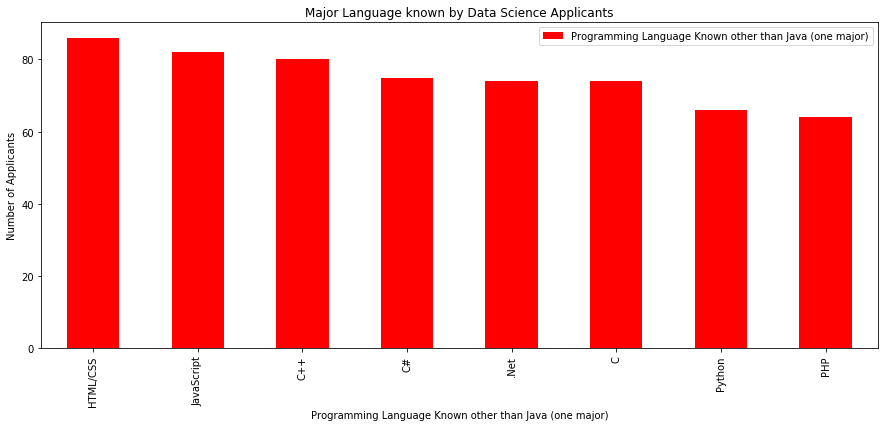

In [14]:
interestplot.plot(kind='bar', figsize=(15, 6),color="red")
plt.xlabel('Programming Language Known other than Java (one major)')
plt.ylabel('Number of Applicants')
plt.title('Major Language known by Data Science Applicants')
plt.show()

# How did you hear about internship ?

In [15]:
dfhow=df["How Did You Hear About This Internship?"]
dfhowplot=dfhow.value_counts().to_frame()
dfhowplot

,How Did You Hear About This Internship?
Intern,1173
Newspaper,1162
Twitter,1160
Blog post,1116
LinkedIn,1112
Friend,1109
Facebook,1084
Other,1077
Ex/Current Employee,1007


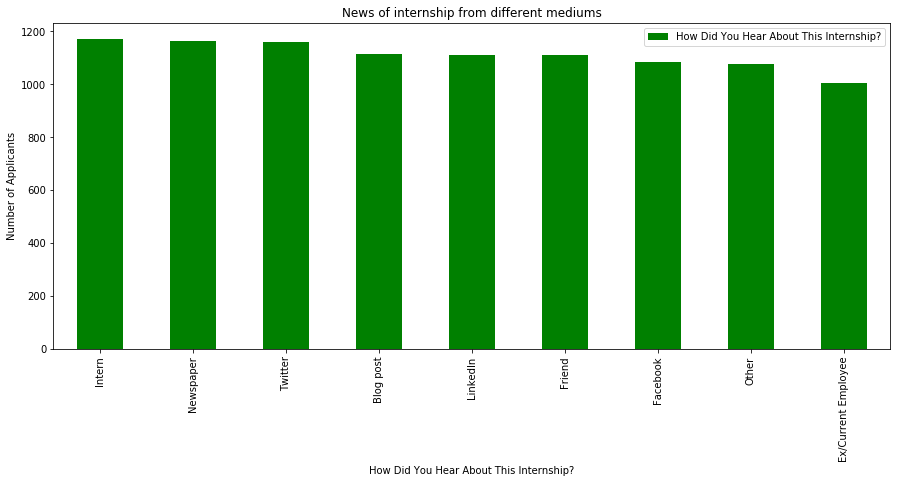

In [16]:
dfhowplot.plot(kind='bar', figsize=(15, 6),color="green")
plt.xlabel("How Did You Hear About This Internship?")
plt.ylabel('Number of Applicants')
plt.title('News of internship from different mediums')
plt.show()


# Students who are in the fourth year and have a CGPA greater than 8.0

In [18]:
df2=df[["Which-year are you studying in?","CGPA/ percentage"]]
cgpa=df2.groupby(["Which-year are you studying in?"])
fourthyear=cgpa.get_group('Fourth-year')
fourthyear1=fourthyear.reset_index(drop=True)

In [43]:
x=[]
x=fourthyear1["CGPA/ percentage"]
greaterthan=[]
for i in range(0,len(fourthyear1)):
    if x[i] >8.0:
        greaterthan.append("YES")
    elif x[i]<8.0 :
        greaterthan.append("NO")


In [20]:
finalcount=pd.DataFrame({"Greater Than 8.0":greaterthan})
cgpaplot=finalcount["Greater Than 8.0"].value_counts().to_frame()
cgpaplot

,Greater Than 8.0
YES,1697
NO,773


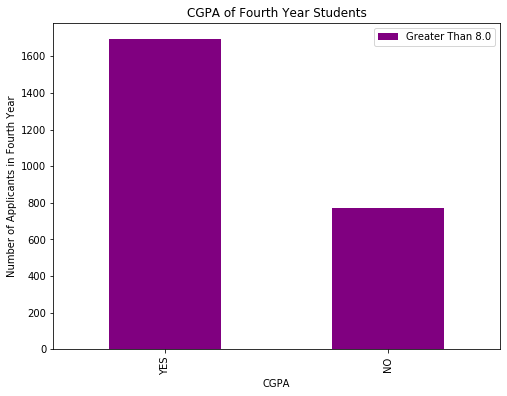

In [44]:
cgpaplot.plot(kind='bar', figsize=(8, 6),color="purple")
plt.xlabel("CGPA")
plt.ylabel('Number of Applicants in Fourth Year')
plt.title('CGPA of Fourth Year Students')
plt.show()

# Students who applied for Digital Marketing with verbal and written communication score greater than 8.

In [25]:
dfdigital=df[["Areas of interest","Rate your verbal communication skills [1-10]","Rate your written communication skills [1-10]"]]
grpdigital=dfdigital.groupby(["Areas of interest"])
digi=grpdigital.get_group("Digital Marketing")
digi1=digi.reset_index(drop=True)

y=digi1["Rate your verbal communication skills [1-10]"].tolist()
z=digi1["Rate your written communication skills [1-10]"].tolist()

grt=[]
for i in range(0,624):
    if y[i]  > 8:
        if z[i]>8:
            grt.append("YES")
        elif z[i]==8:
            grt.append("NO")
        else :
            grt.append("NO")
    elif y[i]==8:
        grt.append("NO")
        
    else:
        grt.append("NO")      

In [26]:
finalcount1=pd.DataFrame({"Greater Than 8":grt})
communicationplot=finalcount1["Greater Than 8"].value_counts().to_frame()
communicationplot

,Greater Than 8
NO,532
YES,92


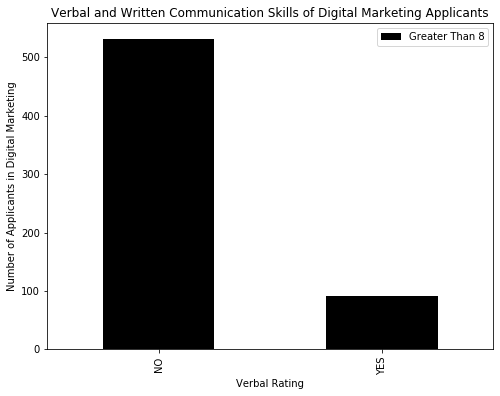

In [28]:
communicationplot.plot(kind='bar', figsize=(8, 6),color="black")
plt.xlabel("Verbal Rating")
plt.ylabel('Number of Applicants in Digital Marketing')
plt.title('Verbal and Written Communication Skills of Digital Marketing Applicants')
plt.show()

# Year-wise and area of study wise classification of students.

In [46]:
year_area = df[["Which-year are you studying in?","Major/Area of Study","City"]].copy()
year_area['Which-year are you studying in?'] = year_area['Which-year are you studying in?'].replace({'First-year':'1st Year', 'Second-year':'2nd Year', 'Third-year':'3rd Year', 'Fourth-year':'4th Year'})
year_area = year_area.groupby(["Which-year are you studying in?","Major/Area of Study"],as_index=False)['City'].count()
print(year_area)

y1 = year_area[year_area["Major/Area of Study"] == "Computer Engineering" ]["City"]
y2 = year_area[year_area["Major/Area of Study"] == "Electrical Engineering" ]["City"]
y3 = year_area[year_area["Major/Area of Study"] == "Electronics and Telecommunication" ]["City"]

   Which-year are you studying in?                Major/Area of Study  City
0                         1st Year               Computer Engineering  1470
1                         1st Year             Electrical Engineering   490
2                         1st Year  Electronics and Telecommunication   550
3                         2nd Year               Computer Engineering  1536
4                         2nd Year             Electrical Engineering   518
5                         2nd Year  Electronics and Telecommunication   496
6                         3rd Year               Computer Engineering  1449
7                         3rd Year             Electrical Engineering   561
8                         3rd Year  Electronics and Telecommunication   453
9                         4th Year               Computer Engineering  1516
10                        4th Year             Electrical Engineering   464
11                        4th Year  Electronics and Telecommunication   497


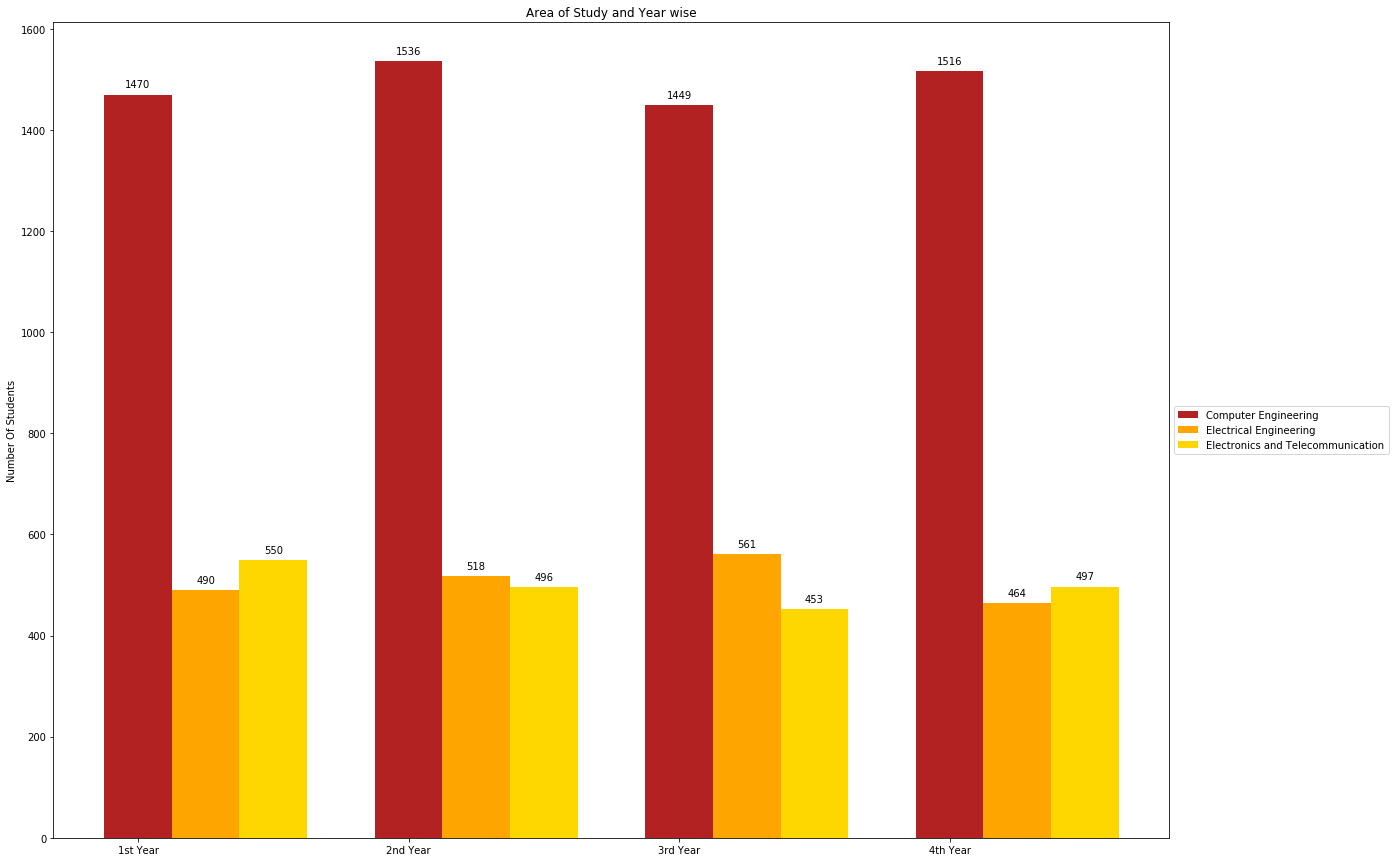

In [47]:
labels = year_area["Which-year are you studying in?"].unique()
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
plt.rcParams["figure.figsize"]= 20,15

fig, ax = plt.subplots()
rects1 = ax.bar(x + 0.0 , y1, width, label='Computer Engineering',align='center',color='firebrick')
rects2 = ax.bar(x + 0.25 , y2, width, label='Electrical Engineering',align='center',color='orange')
rects3 = ax.bar(x + 0.5 , y3, width, label='Electronics and Telecommunication',align='center',color='gold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Students')
ax.set_title('Area of Study and Year wise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# City and college wise classification of students.

In [50]:
city_college = df[["College name","City","Major/Area of Study"]].copy()
city_college = city_college.groupby(["City","College name"],as_index=False)['Major/Area of Study'].count()
city_college

,City,College name,Major/Area of Study
0,Kolhapur,Bharati Vidyapeeth College of Engineering,834
1,Kolhapur,DY Patil College of Engineering And Technology,813
2,Mumbai,K. J. Somaiya College of Engineering,220
3,Mumbai,Rajiv Gandhi Institute of Technology,201
4,Mumbai,Rizvi College of Engineering,222
5,Mumbai,St. Francis Institute of Technology,189
6,Mumbai,Thadomal Shahani Engineering College,192
7,Mumbai,Thakur College Of Engineering And Technology,206
8,Mumbai,Vidyalankar Institute of Technology,207
9,Mumbai,Xavier Institute of Engineering,211


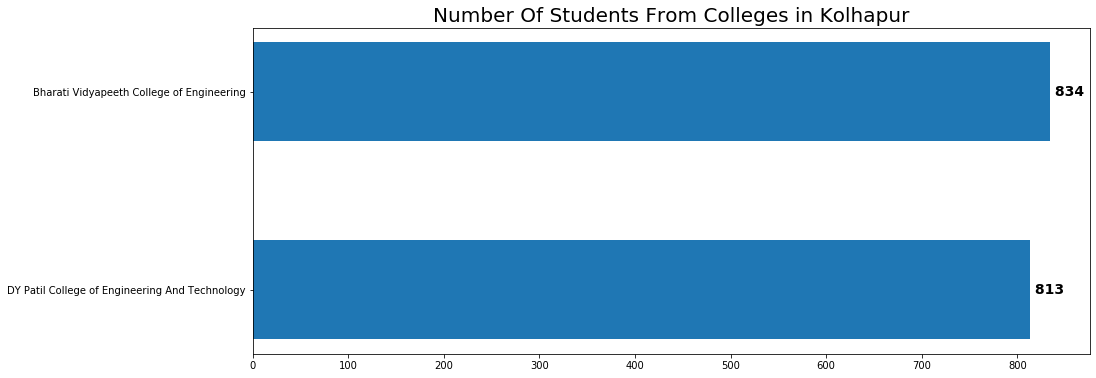

In [54]:
plt.rcParams["figure.figsize"]= 15,6
fig, ax = plt.subplots()
plot1=city_college[city_college['City']=="Kolhapur"]

plot1 = plot1.sort_values(by=['Major/Area of Study'], ascending=False)
x=plot1["College name"]
y=plot1["Major/Area of Study"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

ax.barh(y_pos, y , 0.5,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # Because labels read top to bottom
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold',fontsize=14)

ax.set_title('Number Of Students From Colleges in Kolhapur',fontsize=20)

plt.show()

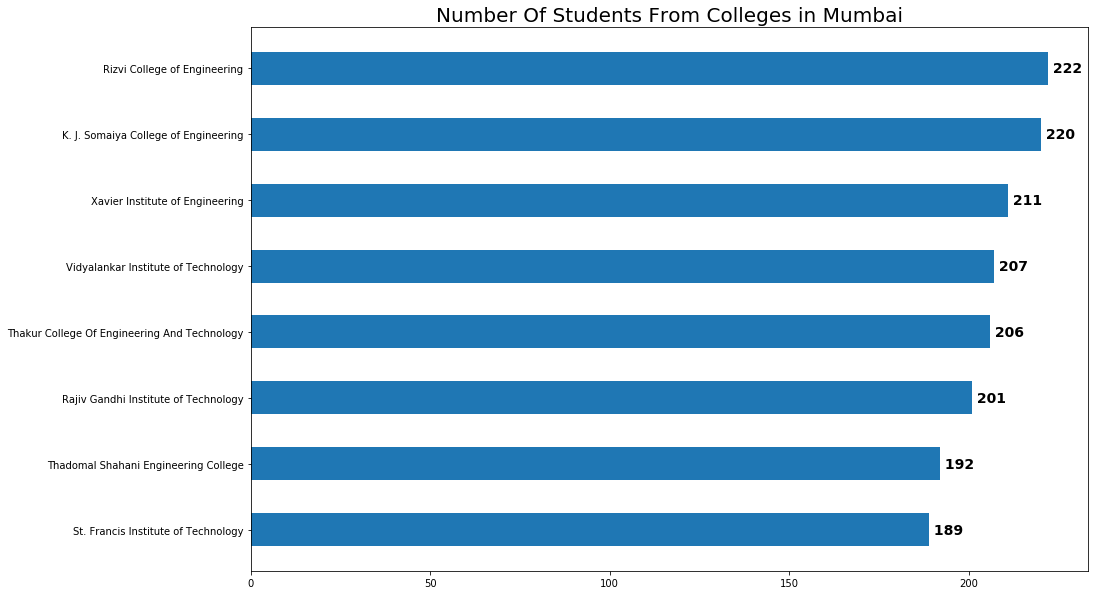

In [60]:
plt.rcParams["figure.figsize"]= 15,10
fig, ax = plt.subplots()
plot2=city_college[city_college['City']=="Mumbai"]

plot2 = plot2.sort_values(by=['Major/Area of Study'], ascending=False)
x=plot2["College name"]
y=plot2["Major/Area of Study"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

ax.barh(y_pos, y , 0.5,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # Because labels read top to bottom
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold',fontsize=14)

ax.set_title('Number Of Students From Colleges in Mumbai',fontsize=20)

plt.show()

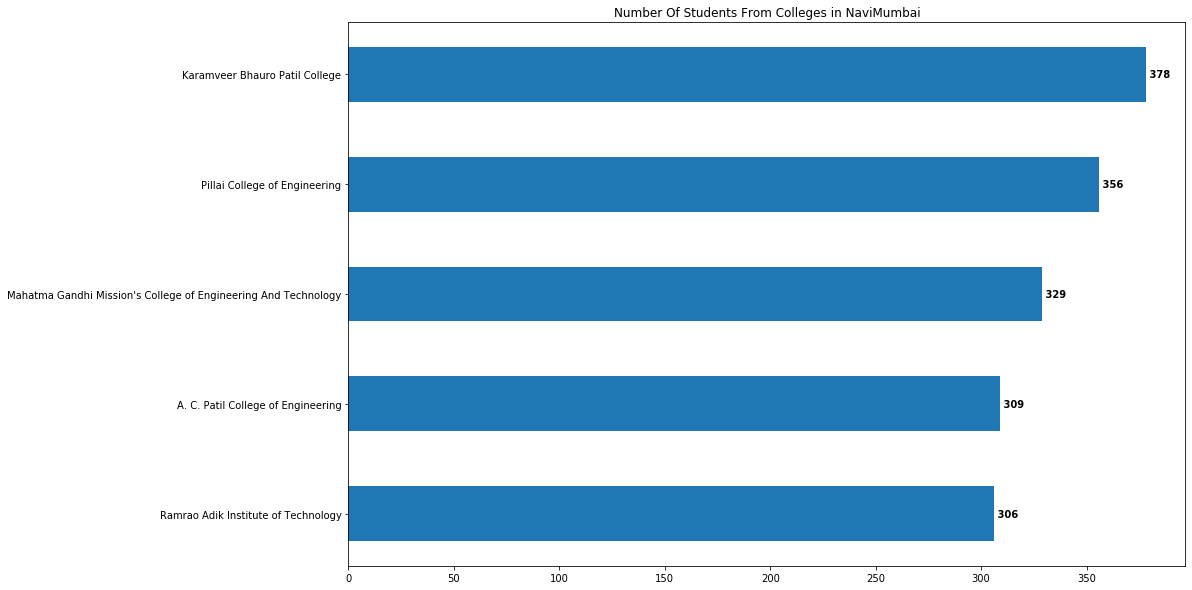

In [62]:
plt.rcParams["figure.figsize"]= 15,10
fig, ax = plt.subplots()
plot3=city_college[city_college['City']=="NaviMumbai"]

plot3 = plot3.sort_values(by=['Major/Area of Study'], ascending=False)
x=plot3["College name"]
y=plot3["Major/Area of Study"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

ax.barh(y_pos, y , 0.5,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # Because labels read top to bottom
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

ax.set_title('Number Of Students From Colleges in NaviMumbai')

plt.show()

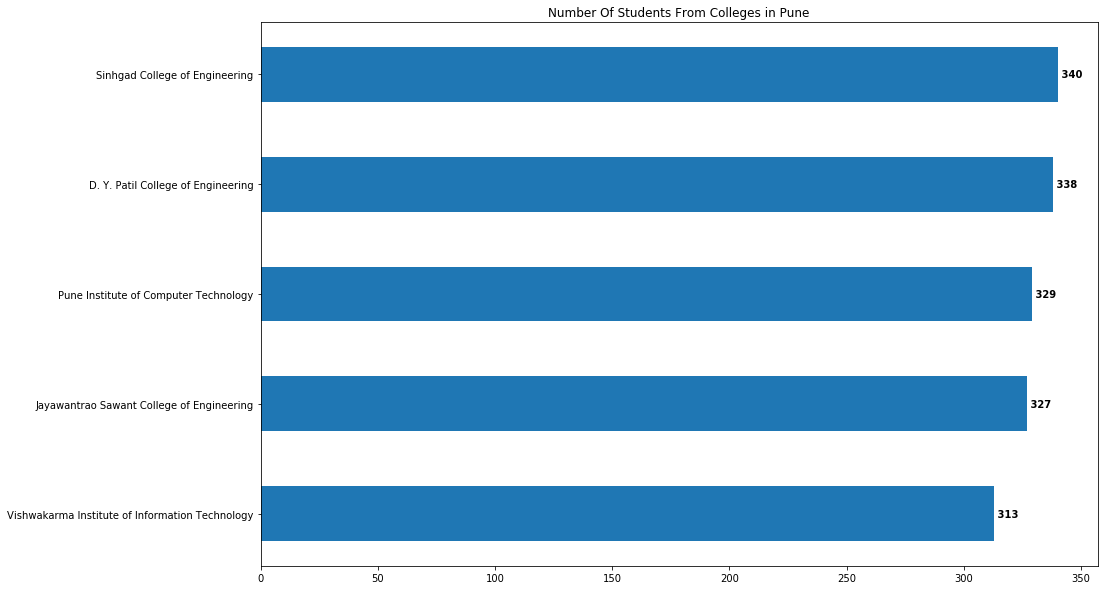

In [63]:
plt.rcParams["figure.figsize"]= 15,10
fig, ax = plt.subplots()
plot4=city_college[city_college['City']=="Pune"]

plot4 = plot4.sort_values(by=['Major/Area of Study'], ascending=False)
x=plot4["College name"]
y=plot4["Major/Area of Study"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

ax.barh(y_pos, y , 0.5,align='center',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # Because labels read top to bottom
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

ax.set_title('Number Of Students From Colleges in Pune')

plt.show()

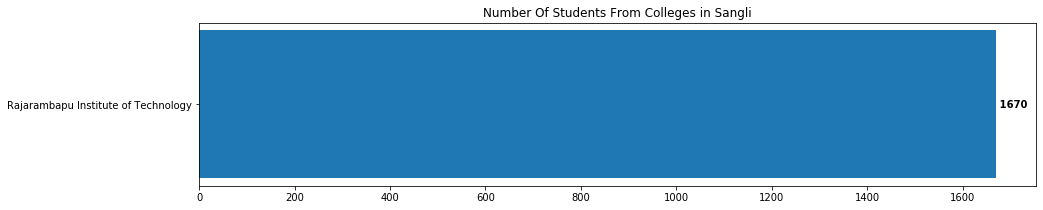

In [66]:
plt.rcParams["figure.figsize"]= 15,3
fig, ax = plt.subplots()
plot5=city_college[city_college['City']=="Sangli"]

plot5 = plot5.sort_values(by=['Major/Area of Study'], ascending=False)
x=plot5["College name"]
y=plot5["Major/Area of Study"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

ax.barh(y_pos, y ,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # Because labels read top to bottom
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

ax.set_title('Number Of Students From Colleges in Sangli')

plt.show()

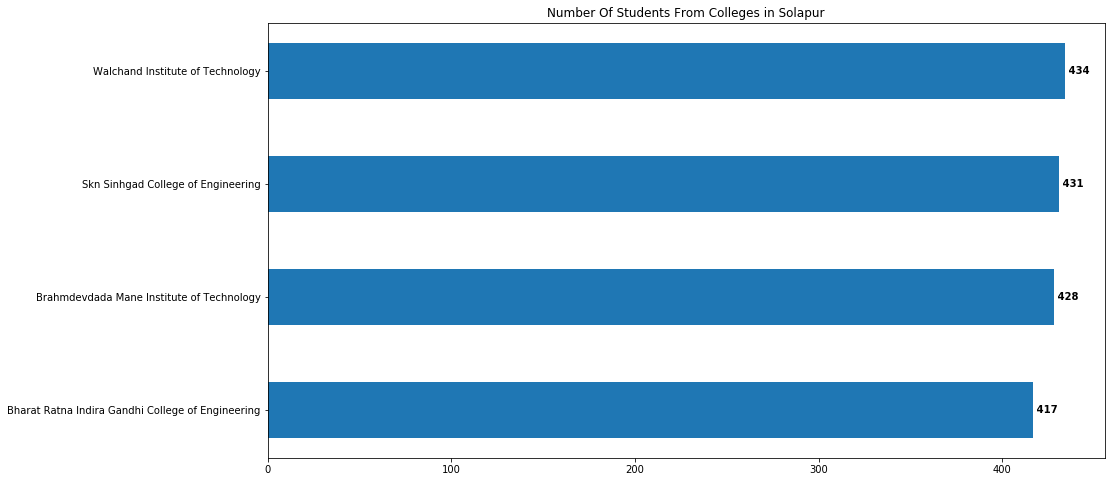

In [67]:
plt.rcParams["figure.figsize"]= 15,8
fig, ax = plt.subplots()
plot6=city_college[city_college['City']=="Solapur"]

plot6 = plot6.sort_values(by=['Major/Area of Study'], ascending=False)
x=plot6["College name"]
y=plot6["Major/Area of Study"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

ax.barh(y_pos, y , 0.5,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # Because labels read top to bottom
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

ax.set_title('Number Of Students From Colleges in Solapur')

plt.show()

# Plot the relationship between the CGPA and the target variable.

In [83]:
lbl=df["Label"].tolist()
x=[]
for i in range(0,len(lbl)):
    if lbl[i]=='eligible':
        x.append(1)
    else:
        x.append(0)
Label=pd.DataFrame({"Label":x})
df=df.drop(["Label"],axis=1)
df=pd.concat([df,Label],axis=1,sort=False)

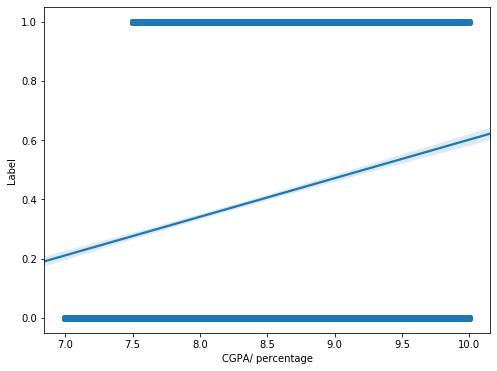

In [84]:
import seaborn as sns
sns.regplot(x="CGPA/ percentage",y="Label",data=df)

# Plot the relationship between the Area of Interest and the target variable.

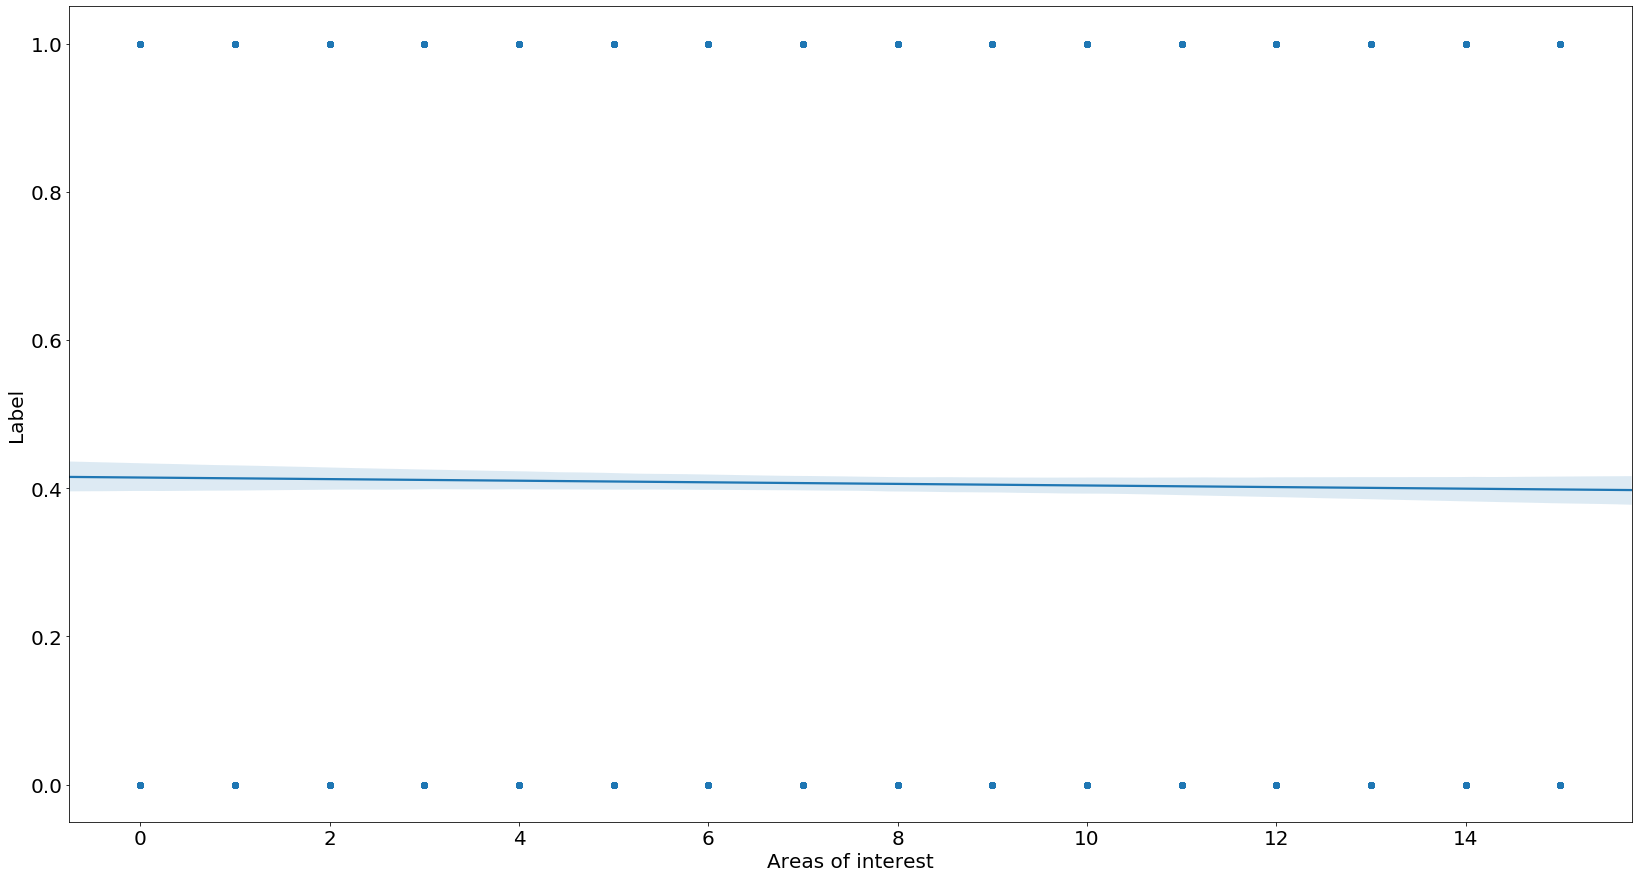

In [97]:
dcode=df
dcode["Areas of interest"] = dcode["Areas of interest"].astype('category')
dcode["Areas of interest"] = dcode["Areas of interest"].cat.codes
sns.regplot(x="Areas of interest",y="Label",data=dfencode)

In [99]:
dfencode[["Areas of interest", "Label"]].corr()

,Areas of interest,Label
Areas of interest,1.000000,-0.010052
Label,-0.010052,1.000000


# Plot the relationship between the year of study, major, and the target variable

In [98]:
dcode["Which-year are you studying in?"]=dcode["Which-year are you studying in?"].astype("category")
dcode["Which-year are you studying in?"]=dcode["Which-year are you studying in?"].cat.codes

dcode["Major/Area of Study"]=dcode["Major/Area of Study"].astype("category")
dcode["Major/Area of Study"]=dcode["Major/Area of Study"].cat.codes

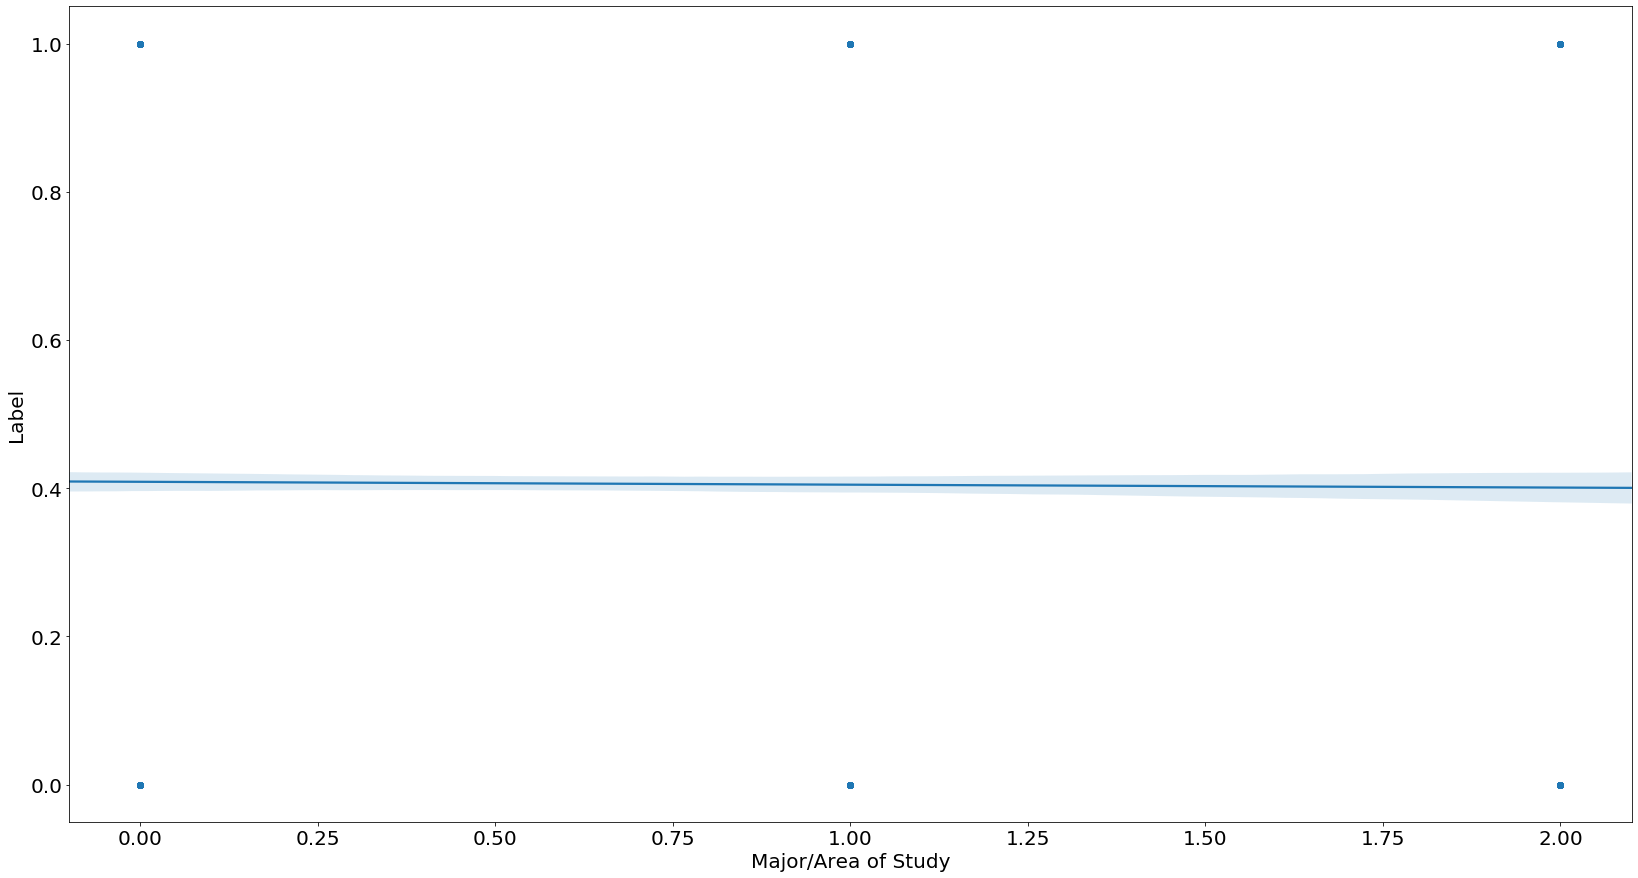

In [91]:
sns.regplot(x="Major/Area of Study",y="Label",data=dfencode)

In [93]:
dcode[["Major/Area of Study", "Label"]].corr()

,Major/Area of Study,Label
Major/Area of Study,1.000000,-0.006358
Label,-0.006358,1.000000


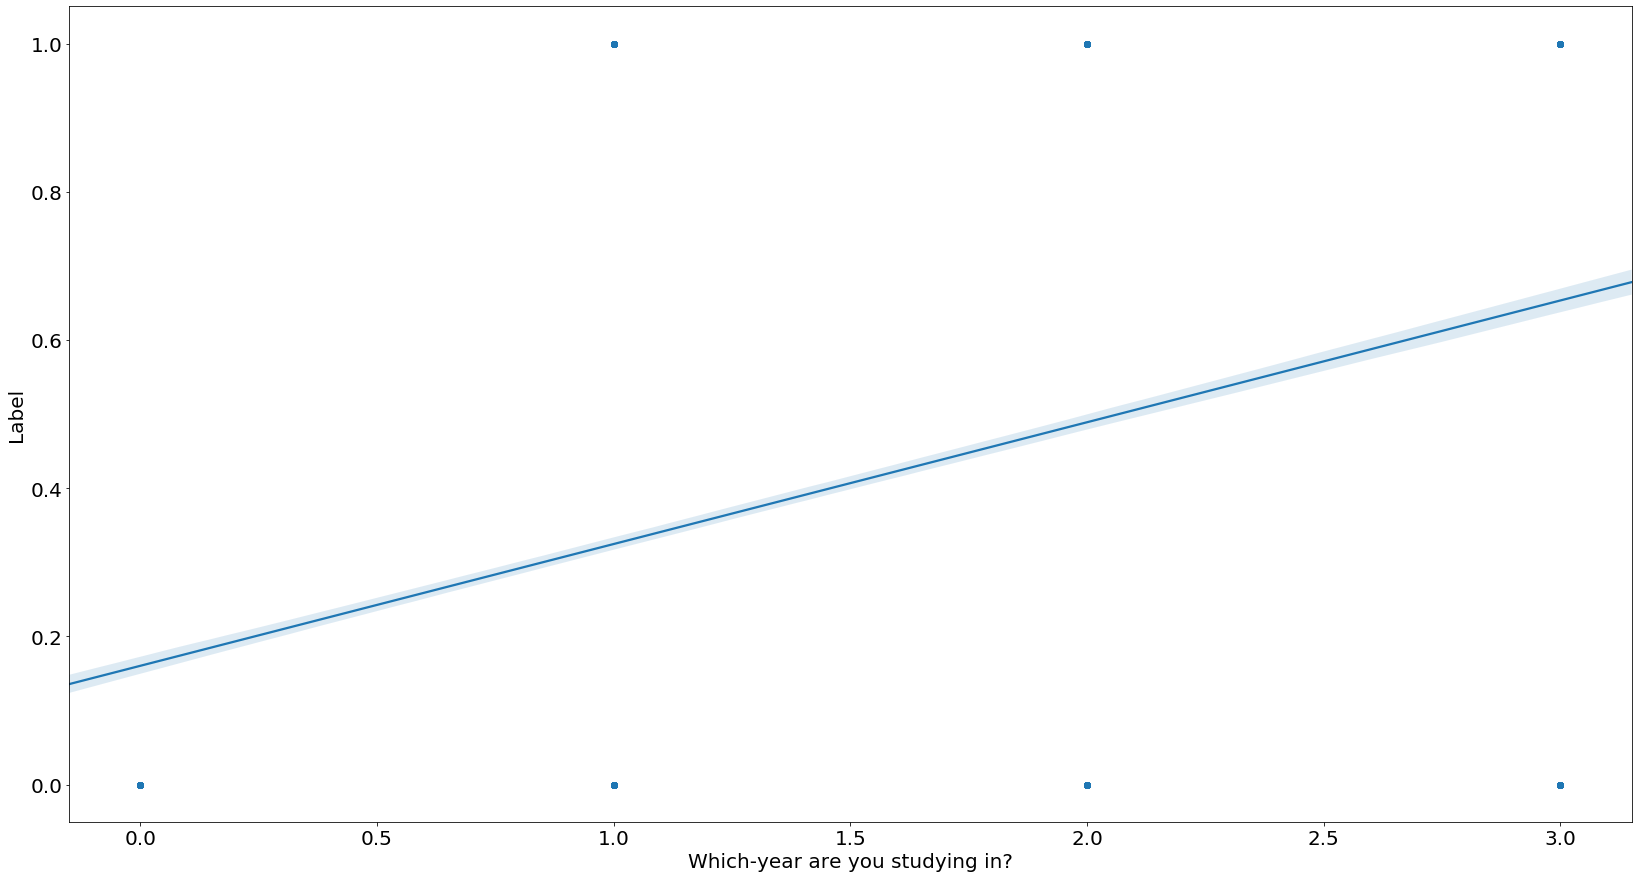

In [94]:
sns.regplot(x="Which-year are you studying in?",y="Label",data=dfencode)

In [96]:
dcode[["Which-year are you studying in?", "Label"]].corr()

,Which-year are you studying in?,Label
Which-year are you studying in?,1.000000,0.373285
Label,0.373285,1.000000
